In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:
df=pd.read_csv("GPT4o_Validated_Cars.csv")

In [9]:
df

,id,exists,comment
0,Porsche- Camry Solara SE- 2005,No,Closest match: Toyota Camry Solara SE 2005
1,Porsche- Carrera GT Base- 2005,Yes,NaN
2,Porsche- Cayenne Base- 2005,Yes,NaN
3,Porsche- Cayenne Diesel- 2005,No,Closest match: Porsche Cayenne Diesel 2009
4,Porsche- Cayenne S- 2005,Yes,NaN
...,...,...,...
28163,Porsche- Boxster Base- 2005,Yes,NaN
28164,Porsche- Boxster Black Edition- 2005,No,Closest match: Porsche- Boxster S- 2005
28165,Porsche- Boxster GTS- 2005,No,Closest match: Porsche- Boxster S- 2005
28166,Porsche- Boxster RS 60 Spyder- 2005,No,Closest match: Porsche- Boxster S- 2005


In [11]:
df.dropna(subset='exists')

,id,exists,comment
0,Porsche- Camry Solara SE- 2005,No,Closest match: Toyota Camry Solara SE 2005
1,Porsche- Carrera GT Base- 2005,Yes,NaN
2,Porsche- Cayenne Base- 2005,Yes,NaN
3,Porsche- Cayenne Diesel- 2005,No,Closest match: Porsche Cayenne Diesel 2009
4,Porsche- Cayenne S- 2005,Yes,NaN
...,...,...,...
28163,Porsche- Boxster Base- 2005,Yes,NaN
28164,Porsche- Boxster Black Edition- 2005,No,Closest match: Porsche- Boxster S- 2005
28165,Porsche- Boxster GTS- 2005,No,Closest match: Porsche- Boxster S- 2005
28166,Porsche- Boxster RS 60 Spyder- 2005,No,Closest match: Porsche- Boxster S- 2005


In [13]:
df.isnull().sum()

id             0
exists         0
comment    15260
dtype: int64

In [15]:
df['exists']=df['exists'].apply(lambda x: 1 if x.lower() == 'yes' else 0)

### Exploratory data analysis

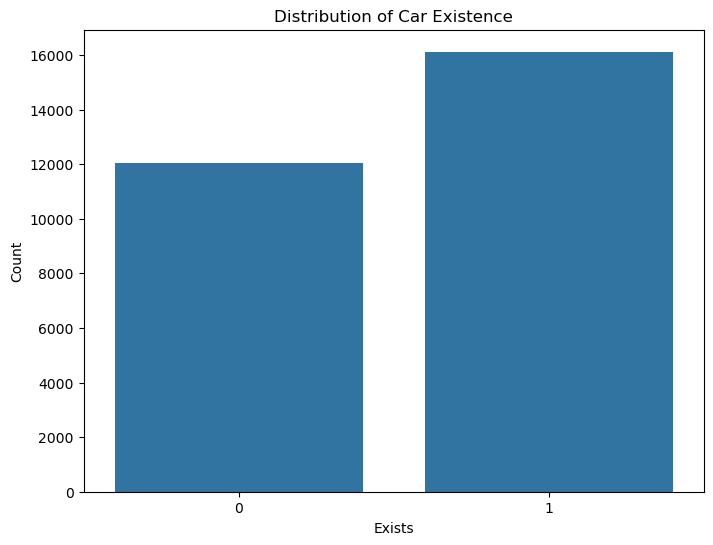

In [39]:
#plot the distribution of 'exists'
plt.figure(figsize=(8,6))
sns.countplot(x='exists', data=df)
plt.title('Distribution of Car Existence')
plt.xlabel('Exists')
plt.ylabel('Count')
plt.show()

### Text Analysis on comments

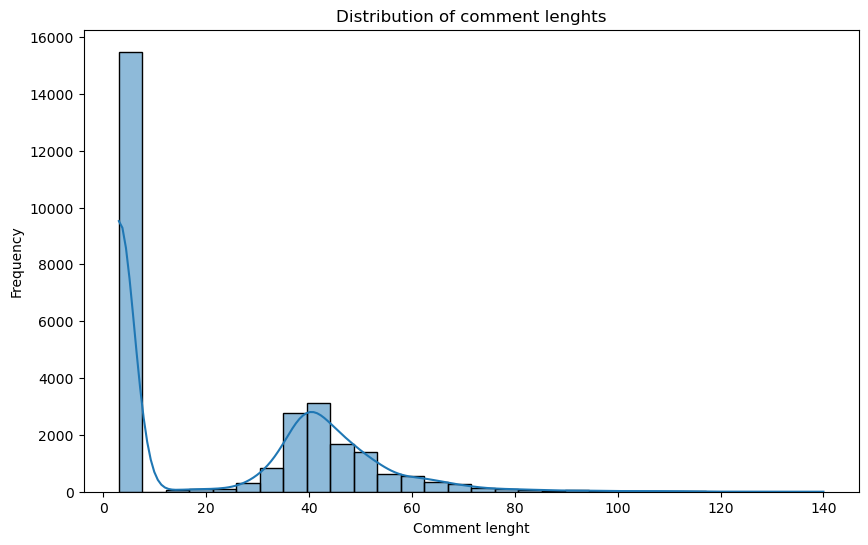

In [54]:
#Basic text analysis on 'comme t' column
df['comment_length']=df['comment'].apply(lambda x: len(str(x)))
plt.figure(figsize=(10,6))
sns.histplot(df['comment_length'], bins=30, kde=True)
plt.title('Distribution of comment lenghts')
plt.xlabel('Comment lenght')
plt.ylabel('Frequency')
plt.show()

### selecting only numeric columns for correlational analysis

In [63]:
numeric_df=df.select_dtypes(include=np.number)

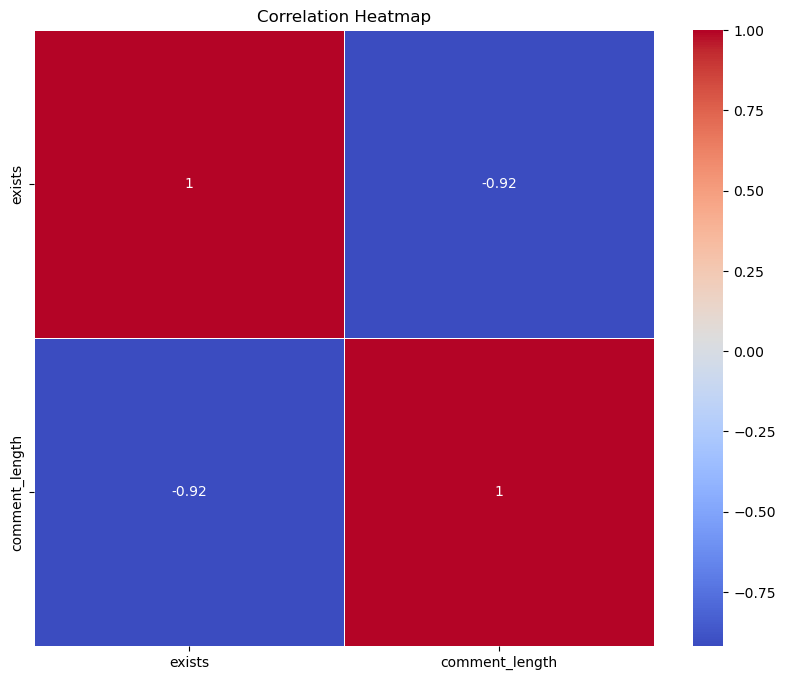

In [65]:
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [67]:
#Preparing data for modeling
X=df[['comment_length']]
y=df['exists']

#Spliting the data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42) 

#initilize and treain the model
model= RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make Predictions
y_pred=model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test,y_pred)
conf_matrix= confusion_matrix(y_test, y_pred)

In [69]:
accuracy

0.9854455094071708

In [71]:
classification_rep

'              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.98      3610\n           1       1.00      0.98      0.99      4841\n\n    accuracy                           0.99      8451\n   macro avg       0.98      0.99      0.99      8451\nweighted avg       0.99      0.99      0.99      8451\n'

In [73]:
conf_matrix

array([[3602,    8],
       [ 115, 4726]], dtype=int64)